In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import defaultdict

In [3]:
from sklearn.metrics import mean_squared_error
from scipy import stats

In [4]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/al_test_experiments/Tdomain'

In [5]:
results_file = os.path.join(data_path, 'results_tdomain_zeroshot.csv')
df_zeroshot = pd.read_csv(results_file)

In [6]:
results_file = os.path.join(data_path, 'results_tdomain_embed.csv')
df_embed = pd.read_csv(results_file)

In [7]:
results_file = os.path.join(data_path, 'results_tdomain_confit.csv')
df_confit = pd.read_csv(results_file)

In [8]:
df_zeroshot.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log,pred_ESM650M_perplexity,pred_ESM3_perplexity,pred_ESMC300M_perplexity,pred_ESMC600M_perplexity,...,pred_ESMC600M_wt_marginal,pred_ESMC600M_masked_marginal,pred_ATC_ESM650M_wt_marginal,pred_ATC_ESM650M_masked_marginal,pred_ATC_ESM3_wt_marginal,pred_ATC_ESM3_masked_marginal,pred_ATC_ESMC300M_wt_marginal,pred_ATC_ESMC300M_masked_marginal,pred_ATC_ESMC600M_wt_marginal,pred_ATC_ESMC600M_masked_marginal
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000,5.838970,5.716982,3.957926,3.351393,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670,4.857078,4.464974,4.347416,3.669246,...,-39.687256,-8.774414,-144.983016,14.836502,-25.346161,15.829101,-45.731812,-23.955811,-48.764160,-33.502930
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.968661,1,45,-0.031841,5.156052,4.475316,3.766888,3.482251,...,-25.489258,-6.632812,-153.497238,5.324289,-23.082673,13.707031,-29.577881,-14.700684,-30.975586,-18.446289
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.039853,2,46,-3.222547,5.747274,4.807921,4.690301,4.395126,...,-37.503906,-27.378235,-161.755241,3.280146,-27.324372,15.036865,-53.395752,-31.878906,-44.700806,-45.307007
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059,5.075125,4.470202,4.324977,3.690752,...,-50.120605,-20.857056,-153.404642,9.361449,-29.924470,13.603394,-60.378174,-33.855591,-58.081665,-37.353882


In [9]:
df_embed.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log,pred_OHE_ridge,pred_OHE_RF,pred_OHE_MLP,pred_ESM650M_res_mean_ridge,...,pred_ESM3_concat_RF,pred_ESM3_concat_MLP,pred_ESMC300M_concat_ridge,pred_ESMC300M_concat_RF,pred_ESMC300M_concat_MLP,pred_ESMC600M_concat_ridge,pred_ESMC600M_concat_RF,pred_ESMC600M_concat_MLP,pred_ESM650M_cls_Linear,pred_ESM650M_cls_MLP
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000,-0.659643,-0.169312,-0.759626,-1.870826,...,-0.157642,-1.095962,-0.081221,-0.203503,-0.115221,-0.137772,-0.163502,0.017245,-3.949700,-2.419444
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670,-0.108781,-2.200851,0.018348,-1.876769,...,-1.569203,2.273441,-0.127652,-2.456075,-0.068602,-0.111695,-1.421251,0.038366,-4.108477,-3.999541
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.968661,1,45,-0.031841,-2.071230,-5.988102,-1.301576,-1.539420,...,-5.315047,-2.641594,-1.309460,-3.886605,-1.741510,-0.733030,-3.215838,-1.124092,-4.144849,-4.634317
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.039853,2,46,-3.222547,-3.251316,-4.807721,-3.182471,-4.206184,...,-3.569541,-2.714573,-3.209845,-4.524015,-3.270136,-3.233049,-4.218788,-3.262974,-4.177826,-5.978636
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059,-0.867136,-2.869766,-0.756685,-2.868851,...,-3.458589,0.098307,-0.915163,-2.974199,-0.846544,-0.913868,-3.022070,-0.764043,-4.189424,-5.389618


In [10]:
df_confit.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log,pred_ESM650M_confit,pred_ESMC300M_confit,pred_ESMC600M_confit
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000,0.000000,0.000000,0.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670,-0.163567,-0.115234,3.343750
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.968661,1,45,-0.031841,-4.698332,1.311523,6.815430
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.039853,2,46,-3.222547,-11.521654,-18.805664,-19.704224
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059,-3.644320,-9.452637,-8.261597


In [11]:
def get_spearmanr_bootstrap(a, b, n=1000):
    assert len(a) == len(b)
    corr = []
    p_value = []
    np.random.seed(0)
    for _ in range(n):
        indices = np.random.choice(len(a), size=len(a), replace=True)
        res = stats.spearmanr(a.iloc[indices], b.iloc[indices])
        
        if not np.isnan(res.statistic):
            corr.append(res.statistic)
            p_value.append(res.pvalue)

    ci_lower, ci_upper = np.percentile(corr, [5, 95]) 
    # stats.t.interval(confidence=0.95, df=len(corr)-1, loc=np.mean(corr), scale=np.std(corr))
    mean_corr = np.mean(corr)

    return round(mean_corr, 2), round(ci_lower, 2), round(ci_upper, 2), corr, p_value

#### Tables

In [12]:
def get_split_mask(df):

    train_mask = (df['split_id'] == 2)

    val_mask = df['split_id'] == 1
    test_mask = df['split_id'] == 0

    return train_mask, val_mask, test_mask

In [13]:
def get_table(df, omit=True, fit_label='fitness_log', omit_label=None):
    table = {}
    for label in df.columns[df.columns.str.contains('pred')]:
        train_mask, val_mask, test_mask = get_split_mask(df)
        assert fit_label in df.columns
        
        if omit:
            assert omit_label is not None and omit_label in df.columns
            omit_mask = df[omit_label] != 0
            train_corr, train_ci_lower, train_ci_upper, *_  = get_spearmanr_bootstrap(df.loc[train_mask & omit_mask, fit_label], df.loc[train_mask & omit_mask, label])
            val_corr, val_ci_lower, val_ci_upper, *_ = get_spearmanr_bootstrap(df.loc[val_mask & omit_mask, fit_label], df.loc[val_mask & omit_mask, label])
            test_corr, test_ci_lower, test_ci_upper, *_ = get_spearmanr_bootstrap(df.loc[test_mask & omit_mask, fit_label], df.loc[test_mask & omit_mask, label])
        else:
            train_corr, train_ci_lower, train_ci_upper, *_ = round(stats.spearmanr(df.loc[train_mask, fit_label], df.loc[train_mask, label]).statistic, 2)
            val_corr, val_ci_lower, val_ci_upper, *_ = round(stats.spearmanr(df.loc[val_mask, fit_label], df.loc[val_mask, label]).statistic, 2)
            test_corr, test_ci_lower, test_ci_upper, *_ = round(stats.spearmanr(df.loc[test_mask, fit_label], df.loc[test_mask, label]).statistic, 2)
        
        table[label] = [train_corr, (train_ci_lower, train_ci_upper), val_corr, (val_ci_lower, val_ci_upper), test_corr, (test_ci_lower, test_ci_upper)]

    df_table = pd.DataFrame(table).T
    df_table.columns = ['train', 'train CI', 'val', 'val CI', 'test', 'test CI']

    return df_table

In [14]:
res_table_embed = get_table(df_embed, omit=True, fit_label='fitness_log', omit_label='fitness_raw')

/tmp/ipykernel_96473/1391682631.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  res = stats.spearmanr(a.iloc[indices], b.iloc[indices])


In [15]:
res_table_embed.head()

,train,train CI,val,val CI,test,test CI
pred_OHE_ridge,0.96,"(0.93, 0.99)",0.32,"(-0.4, 0.88)",0.28,"(-0.14, 0.64)"
pred_OHE_RF,0.84,"(0.7, 0.95)",0.43,"(-0.21, 0.84)",0.29,"(-0.16, 0.69)"
pred_OHE_MLP,0.97,"(0.91, 1.0)",-0.04,"(-0.88, 0.73)",0.08,"(-0.36, 0.48)"
pred_ESM650M_res_mean_ridge,0.67,"(0.49, 0.82)",0.22,"(-0.73, 0.88)",0.5,"(0.23, 0.74)"
pred_ESM650M_res_mean_RF,0.87,"(0.77, 0.96)",0.28,"(-0.7, 0.99)",-0.23,"(-0.6, 0.19)"


In [16]:
res_table_embed.loc[res_table_embed.index.str.contains('OHE')]

,train,train CI,val,val CI,test,test CI
pred_OHE_ridge,0.96,"(0.93, 0.99)",0.32,"(-0.4, 0.88)",0.28,"(-0.14, 0.64)"
pred_OHE_RF,0.84,"(0.7, 0.95)",0.43,"(-0.21, 0.84)",0.29,"(-0.16, 0.69)"
pred_OHE_MLP,0.97,"(0.91, 1.0)",-0.04,"(-0.88, 0.73)",0.08,"(-0.36, 0.48)"


In [17]:
res_table_zeroshot = get_table(df_zeroshot, omit=True, fit_label='fitness_log', omit_label='fitness_raw')

In [18]:
res_table_zeroshot.head()

,train,train CI,val,val CI,test,test CI
pred_ESM650M_perplexity,-0.44,"(-0.65, -0.22)",0.07,"(-0.73, 0.97)",-0.21,"(-0.61, 0.25)"
pred_ESM3_perplexity,-0.51,"(-0.71, -0.27)",0.07,"(-0.73, 0.97)",-0.13,"(-0.54, 0.29)"
pred_ESMC300M_perplexity,-0.7,"(-0.82, -0.57)",0.07,"(-0.73, 0.97)",-0.33,"(-0.68, 0.09)"
pred_ESMC600M_perplexity,-0.71,"(-0.83, -0.56)",-0.28,"(-0.99, 0.7)",-0.35,"(-0.72, 0.05)"
pred_ESM650M_wt_marginal,0.6,"(0.41, 0.78)",0.34,"(-0.68, 0.94)",0.25,"(-0.17, 0.64)"


In [19]:
res_table_zeroshot.loc[res_table_zeroshot.index.str.contains('masked')]

,train,train CI,val,val CI,test,test CI
pred_ESM650M_masked_marginal,0.51,"(0.3, 0.7)",0.28,"(-0.7, 0.99)",0.21,"(-0.22, 0.62)"
pred_ESM3_masked_marginal,0.58,"(0.39, 0.76)",0.1,"(-0.88, 0.88)",-0.02,"(-0.45, 0.4)"
pred_ESMC300M_masked_marginal,0.8,"(0.69, 0.88)",0.1,"(-0.88, 0.88)",0.29,"(-0.1, 0.64)"
pred_ESMC600M_masked_marginal,0.76,"(0.64, 0.85)",0.1,"(-0.88, 0.88)",0.39,"(-0.03, 0.74)"
pred_ATC_ESM650M_masked_marginal,0.53,"(0.3, 0.73)",0.1,"(-0.88, 0.88)",0.14,"(-0.25, 0.52)"
pred_ATC_ESM3_masked_marginal,0.51,"(0.28, 0.71)",0.1,"(-0.88, 0.88)",0.12,"(-0.35, 0.53)"
pred_ATC_ESMC300M_masked_marginal,0.65,"(0.46, 0.81)",0.1,"(-0.88, 0.88)",0.41,"(-0.01, 0.74)"
pred_ATC_ESMC600M_masked_marginal,0.65,"(0.47, 0.81)",0.1,"(-0.88, 0.88)",0.35,"(-0.08, 0.72)"


In [20]:
res_table_confit = get_table(df_confit, omit=True, fit_label='fitness_log', omit_label='fitness_raw')

In [21]:
res_table_confit

,train,train CI,val,val CI,test,test CI
pred_ESM650M_confit,0.95,"(0.88, 0.99)",0.18,"(-0.78, 0.89)",0.35,"(-0.09, 0.74)"
pred_ESMC300M_confit,0.88,"(0.78, 0.95)",0.18,"(-0.78, 0.89)",0.16,"(-0.29, 0.57)"
pred_ESMC600M_confit,0.84,"(0.73, 0.92)",0.19,"(-0.78, 0.96)",0.25,"(-0.22, 0.65)"


In [ ]:
# Train samples : 53 - 41
# Val samples   :  7 -  7
# Test samples  : 18 - 18

In [ ]:
def get_panel_depricated(df, label, omit=True, fit_label='fitness_log', omit_label=None):
    train_mask, val_mask, test_mask = get_split_mask(df)
    assert fit_label in df.columns
    
    fig, ax = plt.subplots(1,3, figsize=(10,3), layout='constrained')

    if omit:
        assert omit_label is not None and omit_label in df.columns
        omit_mask = df[omit_label] != 0
        ax[0].plot(df.loc[train_mask & omit_mask, fit_label], df.loc[train_mask & omit_mask, label], '.', alpha=0.9)
        ax[1].plot(df.loc[val_mask & omit_mask, fit_label], df.loc[val_mask & omit_mask, label], '.', alpha=0.9)
        ax[2].plot(df.loc[test_mask & omit_mask,fit_label], df.loc[test_mask & omit_mask, label], '.', alpha=0.9)

        train_corr = round(stats.spearmanr(df.loc[train_mask & omit_mask, fit_label], df.loc[train_mask & omit_mask, label]).statistic, 2)
        val_corr = round(stats.spearmanr(df.loc[val_mask & omit_mask, fit_label], df.loc[val_mask & omit_mask, label]).statistic, 2)
        test_corr = round(stats.spearmanr(df.loc[test_mask & omit_mask, fit_label], df.loc[test_mask & omit_mask, label]).statistic, 2)

        ax[0].set_title(f'Train\nspearman corr {train_corr}')
        ax[1].set_title(f'Val\nspearman corr {val_corr}')
        ax[2].set_title(f'Test\nspearman corr {test_corr}')
    else:
        ax[0].plot(df.loc[train_mask, fit_label], df.loc[train_mask, label], '.', alpha=0.9)
        ax[1].plot(df.loc[val_mask, fit_label], df.loc[val_mask, label], '.', alpha=0.9)
        ax[2].plot(df.loc[test_mask, fit_label], df.loc[test_mask, label], '.', alpha=0.9)

        train_corr = round(stats.spearmanr(df.loc[train_mask, fit_label], df.loc[train_mask, label]).statistic, 2)
        val_corr = round(stats.spearmanr(df.loc[val_mask, fit_label], df.loc[val_mask, label]).statistic, 2)
        test_corr = round(stats.spearmanr(df.loc[test_mask, fit_label], df.loc[test_mask, label]).statistic, 2)

        ax[0].set_title(f'Train\nspearman corr {train_corr}')
        ax[1].set_title(f'Val\nspearman corr {val_corr}')
        ax[2].set_title(f'Test\nspearman corr {test_corr}')

    for i in range(3):
        ax[i].set_xlabel('True')
        ax[i].set_ylabel('Pred')

    plt.show()

In [30]:
def get_panel(df, label, omit=True, fit_label='fitness_log', omit_label=None, subplots=True):
    train_mask, val_mask, test_mask = get_split_mask(df)
    assert fit_label in df.columns
    
    fig, ax = plt.subplots(1,3, figsize=(10,3), layout='constrained')


    if omit:
        assert omit_label is not None and omit_label in df.columns
        omit_mask = df[omit_label] != 0
        ax[0].plot(df.loc[train_mask & omit_mask, fit_label], df.loc[train_mask & omit_mask, label], '.', alpha=0.9)
        ax[1].plot(df.loc[val_mask & omit_mask, fit_label], df.loc[val_mask & omit_mask, label], '.', alpha=0.9)
        ax[2].plot(df.loc[test_mask & omit_mask,fit_label], df.loc[test_mask & omit_mask, label], '.', alpha=0.9)

        train_corr, train_ci_lower, train_ci_upper, train_corr_list, train_pvalue_list = get_spearmanr_bootstrap(df.loc[train_mask & omit_mask, fit_label], df.loc[train_mask & omit_mask, label]) 
        val_corr, val_ci_lower, val_ci_upper, val_corr_list, val_pvalue_list = get_spearmanr_bootstrap(df.loc[val_mask & omit_mask, fit_label], df.loc[val_mask & omit_mask, label])
        test_corr, test_ci_lower, test_ci_upper, test_corr_list, test_pvalue_list = get_spearmanr_bootstrap(df.loc[test_mask & omit_mask, fit_label], df.loc[test_mask & omit_mask, label])

        ax[0].set_title(f'Train\nspearman corr {train_corr} CI ({train_ci_lower}, {train_ci_upper})')
        ax[1].set_title(f'Val\nspearman corr {val_corr} CI ({val_ci_lower}, {val_ci_upper})')
        ax[2].set_title(f'Test\nspearman corr {test_corr} CI ({test_ci_lower}, {test_ci_upper})')
    else:
        ax[0].plot(df.loc[train_mask, fit_label], df.loc[train_mask, label], '.', alpha=0.9)
        ax[1].plot(df.loc[val_mask, fit_label], df.loc[val_mask, label], '.', alpha=0.9)
        ax[2].plot(df.loc[test_mask, fit_label], df.loc[test_mask, label], '.', alpha=0.9)

        train_corr = round(stats.spearmanr(df.loc[train_mask, fit_label], df.loc[train_mask, label]).statistic, 2)
        val_corr = round(stats.spearmanr(df.loc[val_mask, fit_label], df.loc[val_mask, label]).statistic, 2)
        test_corr = round(stats.spearmanr(df.loc[test_mask, fit_label], df.loc[test_mask, label]).statistic, 2)

        train_corr, train_ci_lower, train_ci_upper, train_corr_list, train_pvalue_list = get_spearmanr_bootstrap(df.loc[train_mask, fit_label], df.loc[train_mask, label]) 
        val_corr, val_ci_lower, val_ci_upper, val_corr_list, val_pvalue_list = get_spearmanr_bootstrap(df.loc[val_mask, fit_label], df.loc[val_mask, label])
        test_corr, test_ci_lower, test_ci_upper, test_corr_list, test_pvalue_list = get_spearmanr_bootstrap(df.loc[test_mask, fit_label], df.loc[test_mask, label])

        ax[0].set_title(f'Train\nspearman corr {train_corr} CI ({train_ci_lower}, {train_ci_upper})')
        ax[1].set_title(f'Val\nspearman corr {val_corr} CI ({val_ci_lower}, {val_ci_upper})')
        ax[2].set_title(f'Test\nspearman corr {test_corr} CI ({test_ci_lower}, {test_ci_upper})')

    for i in range(3):
        ax[i].set_xlabel('True')
        ax[i].set_ylabel('Pred')

    plt.show()

    if subplots:
        fig, ax = plt.subplots(1,3, figsize=(10,3), layout='constrained')
        ax[0].hist(train_corr_list)
        ax[1].hist(val_corr_list)
        ax[2].hist(test_corr_list)
        plt.show()
        fig, ax = plt.subplots(1,3, figsize=(10,3), layout='constrained')
        ax[0].hist(train_pvalue_list)
        ax[1].hist(val_pvalue_list)
        ax[2].hist(test_pvalue_list)
        plt.show()
        

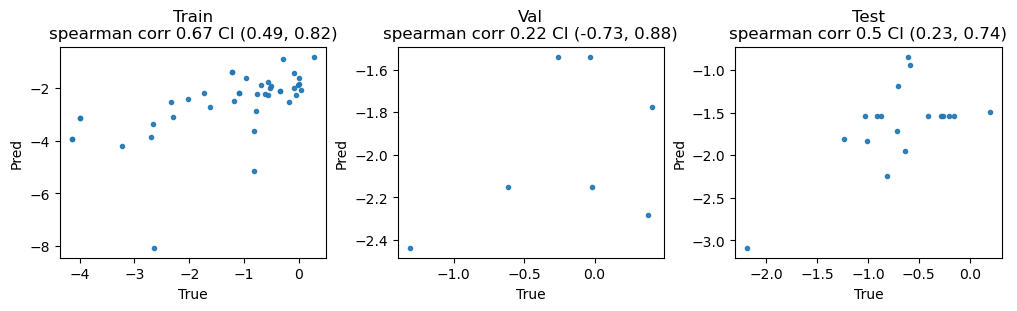

In [31]:
get_panel(df_embed, label='pred_ESM650M_res_mean_ridge', omit=True, fit_label='fitness_log', omit_label='fitness_raw', subplots=False)

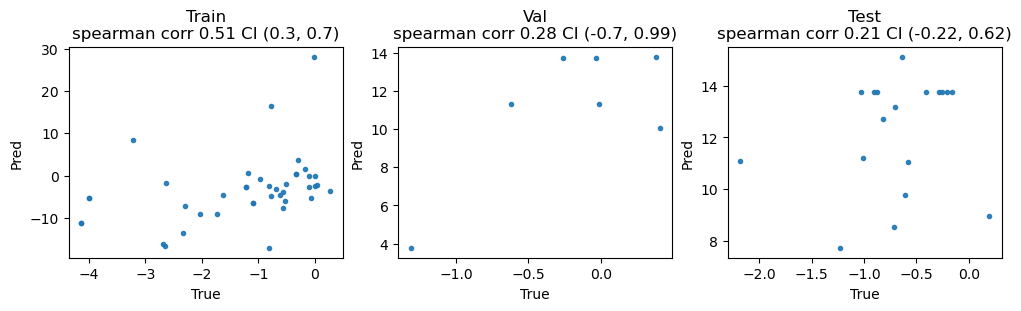

In [34]:
get_panel(df_zeroshot, label='pred_ESM650M_masked_marginal', omit=True, fit_label='fitness_log', omit_label='fitness_raw', subplots=False)

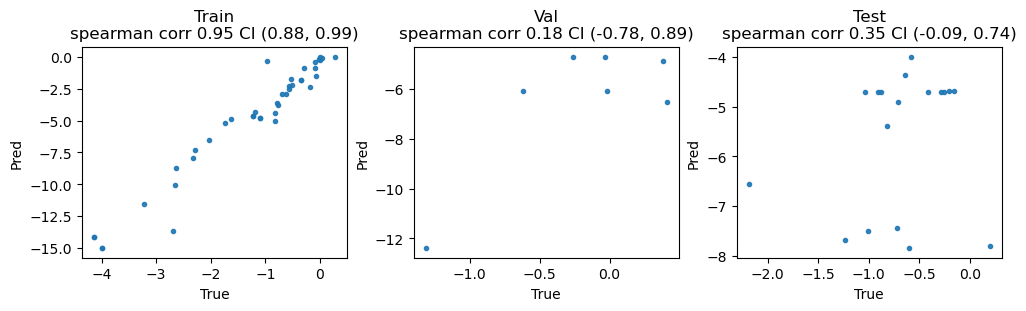

In [35]:
get_panel(df_confit, label='pred_ESM650M_confit', omit=True, fit_label='fitness_log', omit_label='fitness_raw', subplots=False)

In [ ]:
train_mask, val_mask, test_mask = get_split_mask(df_zeroshot)
fig, ax = plt.subplots(1,3, figsize=(10,3), layout='constrained')
_omit_mask = df_zeroshot['fitness_raw'] != 0
ax[0].hist(df_zeroshot.loc[train_mask & _omit_mask, 'n_mut'])
ax[1].hist(df_zeroshot.loc[val_mask & _omit_mask, 'n_mut'])
ax[2].hist(df_zeroshot.loc[test_mask & _omit_mask,'n_mut'])
for i in range(3):
    ax[i].set_xlabel('# mutations')

plt.show()

In [ ]:
def plot_comparison_corr_methods(df):
    ridge = defaultdict(list)
    rf    = defaultdict(list)
    mlp   = defaultdict(list)
    for idx in df.index:
        if not 'cls' in idx:
            if 'ridge' in idx:
                ridge['train'].append(df.loc[idx, 'train'])
                ridge['val'].append(df.loc[idx, 'val'])
                ridge['test'].append(df.loc[idx, 'test'])
            elif 'RF' in idx:
                rf['train'].append(df.loc[idx, 'train'])
                rf['val'].append(df.loc[idx, 'val'])
                rf['test'].append(df.loc[idx, 'test'])
            elif 'MLP' in idx:
                mlp['train'].append(df.loc[idx, 'train'])
                mlp['val'].append(df.loc[idx, 'val'])
                mlp['test'].append(df.loc[idx, 'test'])
            else:
                raise Exception('Huh?')
            
    def my_floor(a, precision=1):
        return np.round(a - 0.5 * 10**(-precision), precision)
            
    fig, ax = plt.subplots(1, 3, figsize=(10, 3), layout='constrained')
    for i, dset in enumerate(['train', 'val', 'test']):
        # ax[i].hist(ridge[dset], label='ridge', alpha=0.8, 
        #            bins=np.arange(my_floor(np.nanmin(ridge[dset])),1.05,0.1))
        # ax[i].hist(rf[dset], label='rf', alpha=0.5,
        #            bins=np.arange(my_floor(np.nanmin(rf[dset])),1.05,0.1))
        # ax[i].hist(mlp[dset], label='mlp', alpha=0.3,
        #            bins=np.arange(my_floor(np.nanmin(mlp[dset])),1.05,0.1))
        
        _min = my_floor(np.nanmin(ridge[dset]+rf[dset]+mlp[dset]))
        ax[i].hist([ridge[dset], rf[dset], mlp[dset]], 
                   label=['linear', 'rf', 'mlp'], 
                   alpha=0.8, 
                   bins=np.arange(my_floor(_min),1.05,0.1))


        ax[i].legend()

    plt.show()

In [ ]:
plot_comparison_corr_methods(res_table_embed)

In [ ]:
omit = True
fig, ax = plt.subplots(2, 2, figsize=(6,6), layout='constrained')

if omit:
    _omit_mask = df_zeroshot['fitness_raw'] != 0
    for _label, _ax in zip(df_zeroshot.columns[df_zeroshot.columns.str.contains('perplexity')], ax.flatten()):
        _ax.plot(df_zeroshot.loc[_omit_mask, 'fitness_raw'], df_zeroshot.loc[_omit_mask, _label], '.', alpha=0.8)
        _ax.set_xlabel('true / titer')
        _ax.set_ylabel('perplexity')
        _ax.set_title(_label.replace('pred_', '').replace('_perplexity', ''))
else:
    for _label, _ax in zip(df_zeroshot.columns[df_zeroshot.columns.str.contains('perplexity')], ax.flatten()):
        _ax.plot(df_zeroshot['fitness_raw'], df_zeroshot[_label], '.', alpha=0.8)
        _ax.set_xlabel('true / titer')
        _ax.set_ylabel('perplexity')
        _ax.set_title(_label.replace('pred_', '').replace('_perplexity', ''))

In [ ]:
def get_table_all(df, omit=True, fit_label='fitness_log', omit_label='fitness_raw'):
    table = {}
    for label in df.columns[df.columns.str.contains('pred')]:
        assert fit_label in df.columns
        
        if omit:
            assert omit_label is not None and omit_label in df.columns
            omit_mask = df[omit_label] != 0
            corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df.loc[omit_mask, fit_label], df.loc[omit_mask, label]) 
        else:
            corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df.loc[fit_label], df.loc[label])
        
        table[label] = [corr, (ci_lower, ci_upper)]

    df_table = pd.DataFrame(table).T
    df_table.columns = ['corr', '90% CI']

    return df_table

In [ ]:
res_zeroshot_all = get_table_all(df_zeroshot, omit=True, fit_label='fitness_log', omit_label='fitness_raw')
res_zeroshot_all.loc[res_zeroshot_all.index.str.contains('masked')]

In [ ]:
omit = True
predictor = 'masked_marginal'
# predictor = 'wt_marginal'
fig, ax = plt.subplots(2, 2, figsize=(6,6), layout='constrained')

if omit:
    _omit_mask = df_zeroshot['fitness_raw'] != 0
    for _label, _ax in zip(df_zeroshot.columns[df_zeroshot.columns.str.contains(predictor)], ax.flatten()):
        _ax.plot(df_zeroshot.loc[_omit_mask, 'fitness_log'], df_zeroshot.loc[_omit_mask, _label], '.', alpha=0.8)
        corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df_zeroshot.loc[_omit_mask, 'fitness_log'], df_zeroshot.loc[_omit_mask, _label])
        _ax.set_xlabel('true')
        _ax.set_ylabel('pred')
        _ax.set_title(f"{_label.replace('pred_', '')}\nspearman corr {corr} CI ({ci_lower}, {ci_upper})", size=10)
else:
    for _label, _ax in zip(df_zeroshot.columns[df_zeroshot.columns.str.contains(predictor)], ax.flatten()):
        _ax.plot(df_zeroshot['fitness_log'], df_zeroshot[_label], '.', alpha=0.8)
        corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df_zeroshot['fitness_log'], df_zeroshot[_label])
        _ax.set_xlabel('true')
        _ax.set_ylabel('perplexity')
        _ax.set_title(f"{_label.replace('pred_', '')}\nspearman corr {corr} CI ({ci_lower}, {ci_upper})", size=10)

In [ ]:
def _plot(df, mask, label):
    fig, ax = plt.subplots(1, 2, figsize=(7,3), layout='constrained')

    ax[0].plot(df.loc[mask, 'fitness_log'], df.loc[mask, label], '.', alpha=0.8)
    corr, ci_lower, ci_upper, *_ = get_spearmanr_bootstrap(df.loc[mask, 'fitness_log'], df.loc[mask, label])
    ax[0].set_xlabel('true')
    ax[0].set_ylabel('pred')
    ax[0].set_title(f"{_label.replace('pred_', '')}\nspearman corr {corr} CI ({ci_lower}, {ci_upper})", size=10)

    ax[1].hist(df_zeroshot.loc[mask, 'n_mut'])
    ax[1].set_xlabel('# mutations')
    plt.show()

_label = 'pred_ESMC600M_masked_marginal'
_omit_mask = df_zeroshot['fitness_raw'] != 0
# _omit_mask = df_zeroshot['fitness_raw'] > -1000

_plot(df_zeroshot, _omit_mask, _label)

mut_mask_20 = df_zeroshot['n_mut'] < 20
_mask = _omit_mask & mut_mask_20
_plot(df_zeroshot, _mask, _label)
_mask = _omit_mask & ~mut_mask_20
_plot(df_zeroshot, _mask, _label)

_mask = _omit_mask & (df_zeroshot['n_mut'] < 2.5)
_plot(df_zeroshot, _mask, _label)

_mask = _omit_mask & (df_zeroshot['n_mut'].between(2.5,20))
_plot(df_zeroshot, _mask, _label)
